In [2]:
import pandas as pd

In [3]:
def team_big_csv(team_name):
    offense = pd.read_csv(f"{team_name}offense.csv", skiprows=1)
    defense = pd.read_csv(f"{team_name}defense.csv", skiprows=1)
    offense["Type"] = "Offense"
    defense["Type"] = "Defense"
    both = pd.concat([offense, defense])
    both["Rating"] = both["Pts"]/both["Poss"] * 100
    both["Pace"] = ((both["Poss"].sum()/(both["GP"] * 40))*40)/2
    return both

In [4]:
def a_csv(file_name):
    df = pd.read_csv(f"{file_name}.csv", skiprows=1)
    df["Rating"] = df["Pts"]/df["Poss"] * 100
    df["Pace"] = ((df["Poss"].sum()/(df["GP"] * 40))*40)/2
    return df

In [5]:
caltech = team_big_csv("caltech")
westmont = team_big_csv("westmont")

In [6]:
both = pd.concat([caltech, westmont])

In [7]:
both

,#,Team,GP,%Time,Poss,Pts,PPP,FG Miss,FG Made,FG Att,FG%,eFG%,TO%,%FT,%SF,Score%,Type,Rating,Pace
0,1,Caltech Beavers,27,100,2272,1803,0.794,1000,643,1643,39.1,46.4,19.4,10.6,7.4,35.2,Offense,79.357394,82.018519
0,1,Caltech Beavers,27,100,2157,1910,0.885,886,677,1563,43.3,49.2,16.0,13.2,8.3,41.1,Defense,88.548911,82.018519
0,1,Westmont Warriors,27,100,2265,2132,0.941,900,782,1682,46.5,53.7,16.7,11.3,8.3,42.4,Offense,94.128035,85.037037
0,1,Westmont Warriors,27,100,2327,2066,0.888,1017,769,1786,43.1,49.2,15.2,10.1,8.4,40.4,Defense,88.783842,85.037037


In [91]:
df = a_csv("playerstats")
threes = a_csv("threes")
threes["3P%"] = threes["FG%"]

In [115]:
pd.merge(df, threes[["Player", "3P%"]], on="Player").to_csv("blah.csv", index=False)

In [72]:
att_sum = {"Near Rim": 0, "Midrange": 0, "Threes": 0}
att_sum["Near Rim"] = a_csv("atrim")["FG Att"].sum() + a_csv("aroundbasket")["FG Att"].sum()
att_sum["Midrange"] = a_csv("midrange")["FG Att"].sum()
att_sum["Threes"] = a_csv("Threes")["FG Att"].sum()

In [73]:
points_sum = {"Near Rim": 0, "Midrange": 0, "Threes": 0}
points_sum["Near Rim"] = (a_csv("atrim")["Pts"].sum() + a_csv("aroundbasket")["Pts"].sum()) / (a_csv("atrim")["Poss"].sum() + a_csv("aroundbasket")["Poss"].sum())
points_sum["Midrange"] = (a_csv("midrange")["Pts"].sum()) / (a_csv("midrange")["Poss"].sum())
points_sum["Threes"] = (a_csv("Threes")["Pts"].sum()) / (a_csv("Threes")["Poss"].sum())

In [74]:
points_sum

{'Near Rim': 1.2358887952822242,
 'Midrange': 0.8898305084745762,
 'Threes': 1.1145833333333333}

In [75]:
import matplotlib.pyplot as plt

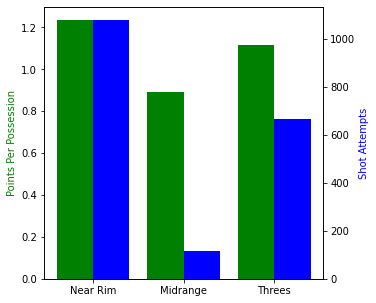

In [114]:
# plt.plot(points_sum.keys(), points_sum.values())
# plt.ylabel("Points Per Possession")
# #plt.plot(att_sum.keys(), att_sum.values())
plt.rcParams['figure.figsize'] = [5, 5]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(points_sum.keys(), points_sum.values(), color="green", align="edge", width=-0.4)
ax2.bar(att_sum.keys(), att_sum.values(), color="blue", align="edge", width=0.4)
ax1.set_ylabel('Points Per Possession', color='g')
ax2.set_ylabel('Shot Attempts', color='b')
plt.show()